# Chapter 04 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import matplotlib.pyplot as plt
import mlba
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
bostonHousing_df = mlba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.head(9)
bostonHousing_df.describe()

# Compute mean, standard deviation, min, max, median, length, and missing values of
# CRIM
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))
print('Number of missing values : ', bostonHousing_df.CRIM.isna().sum())

# Compute mean, standard dev., min, max, median, length, and missing values for all
# variables
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isna().sum(),
             })

Mean :  3.613523557312254
Std. dev :  8.60154510533249
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of missing values :  0


,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


 Partial output

In [4]:
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


In [5]:
bostonHousing_df = mlba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.CHAS.value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
# Create bins of size 1 for variable using the method pd.cut. By default, the method
# creates a categorical variable, e.g. (6,7]. The argument labels=False returns
# integers instead, e.g. 6.
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(10), labels=False)

# Compute the average of MEDV by (binned) RM and CHAS. First group the data frame
# using the groupby method, then restrict the analysis to MEDV and determine the
# mean for each group.
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [7]:
bostonHousing_df = mlba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
# create bins of size 1
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(10), labels=False)

# use pivot_table() to reshape data and generate pivot table
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'],
               aggfunc='mean', margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


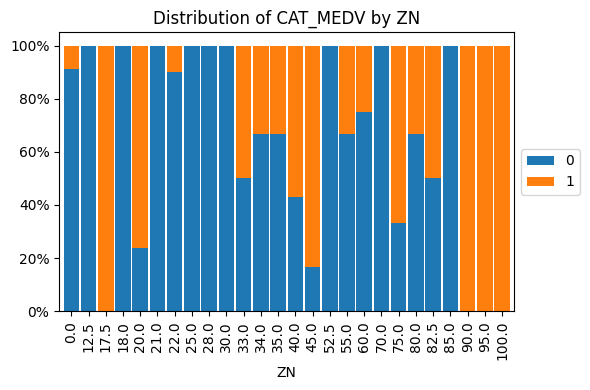

In [8]:
# use method crosstab to create a cross-tabulation of two variables
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)

# convert numbers to ratios
propTbl = tbl / tbl.sum()
propTbl.round(2)

# plot the ratios in a stacked bar chart
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9, figsize=(6, 4))
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])
plt.title('Distribution of CAT_MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [9]:
cereals_df = mlba.load_data('Cereals.csv')
pca = PCA(n_components=2)
pca.fit(cereals_df[['calories', 'rating']])

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['PC1', 'PC2']
pcaSummary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [10]:
pcaComponents_df = pd.DataFrame(pca.components_.transpose(), columns=['PC1', 'PC2'],
                                index=['calories', 'rating'])
pcaComponents_df

,PC1,PC2
calories,0.847053,0.531508
rating,-0.531508,0.847053


In [11]:
scores = pd.DataFrame(pca.transform(cereals_df[['calories', 'rating']]),
                      columns=['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,-44.921528,2.197183
1,15.725265,-0.382416
2,-40.149935,-5.407212
3,-75.310772,12.999126
4,7.041508,-5.357686


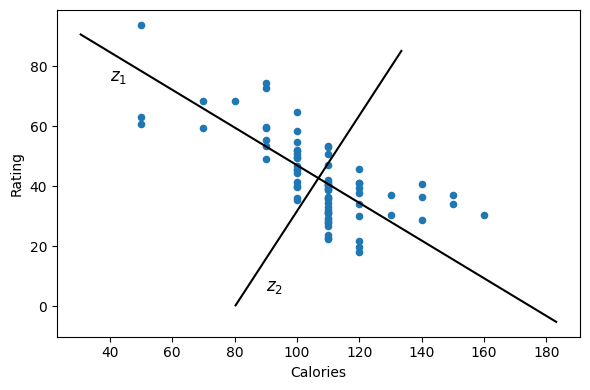

In [12]:
def getPCaxis(f, pca, pcLabel):
    return pd.DataFrame([pca.mean_ + f * pca.components_[pcLabel, :],
                         pca.mean_ - f * pca.components_[pcLabel, :]],
                        columns=['calories', 'rating'])
PC1 = getPCaxis(90, pca, 0)
PC2 = getPCaxis(50, pca, 1)

ax = cereals_df.plot.scatter(x='calories', y='rating', figsize=(6, 4))
PC1.plot(x='calories', y='rating', ax=ax, c='black')
PC2.plot(x='calories', y='rating', ax=ax, c='black')
ax.text(40, 75, '$z_1$', fontsize=12)
ax.text(90, 5, '$z_2$', fontsize=12)
ax.set_xlabel('Calories')
ax.set_ylabel('Rating')
ax.legend().set_visible(False)
plt.tight_layout()
plt.show()

In [13]:
pca = PCA()
pca.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = [f'PC{i}' for i in range(1, len(pcaSummary_df.columns) + 1)]
pcaSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


In [14]:
pcaComponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_df.columns,
                                index=cereals_df.iloc[:, 3:].columns)
pcaComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,-0.000757,0.008801,0.001026,0.003200,0.056176
fat,-0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,-0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,-0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,-0.001541,0.004360,0.012489,0.005647,-0.007876


In [15]:
pca = PCA()
pca.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = [f'PC{i}' for i in range(1, len(pcaSummary_df.columns) + 1)]
pcaSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [16]:
pcaComponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_df.columns,
                                index=cereals_df.iloc[:, 3:].columns)
pcaComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,0.393148,0.114857,-0.204359,0.203899
protein,0.307356,0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,-0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,0.265050,-0.001531,0.638879,0.329101


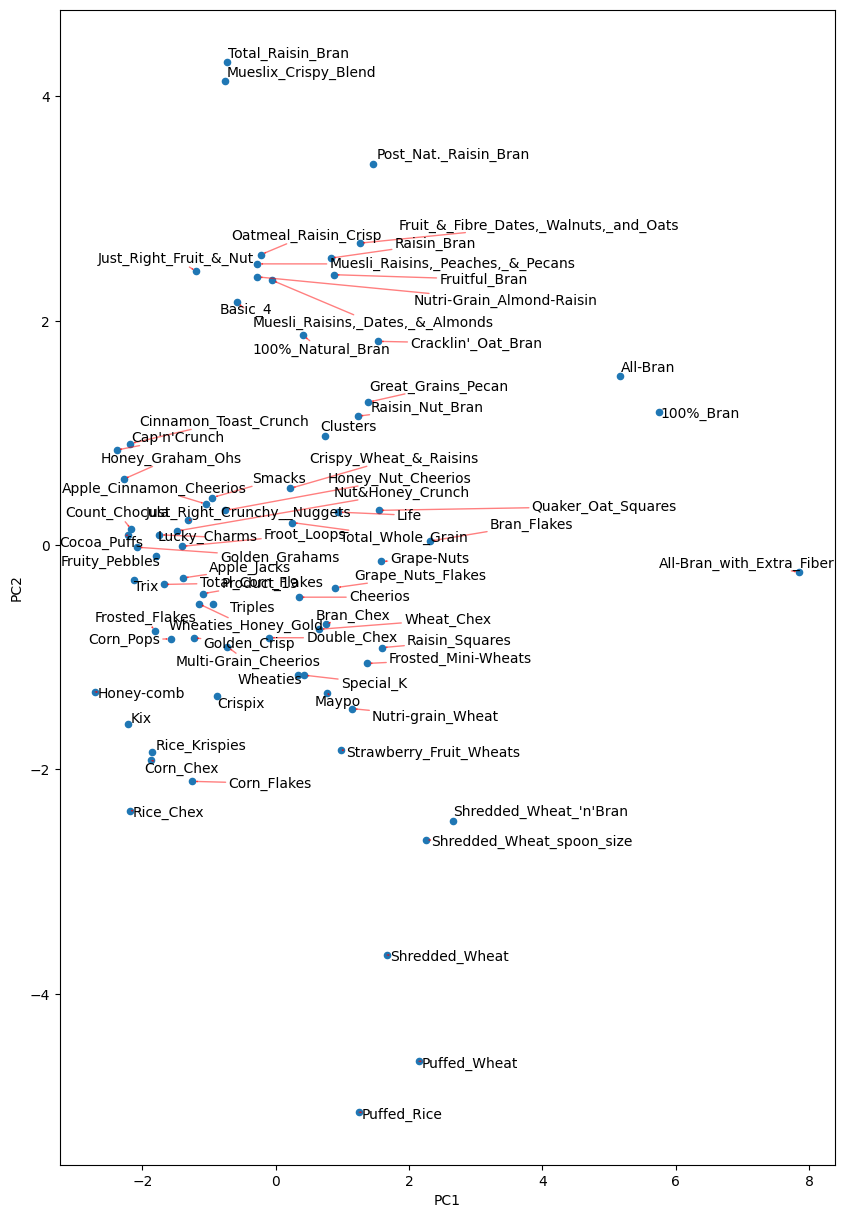

In [17]:
# Python version 1: Labelled scatter plot of the first two principal components
from adjustText import adjust_text
cereals_red_df = cereals_df.dropna(axis=0)
cereals_red_df = cereals_red_df.reset_index(drop=True)

scores = pd.DataFrame(pca.fit_transform(preprocessing.scale(cereals_red_df.iloc[:, 3:].dropna(axis=0))),
                      columns=[f'PC{i}' for i in range(1, 14)])
cereals_pca_df = pd.concat([cereals_red_df['name'].dropna(axis=0), scores[['PC1', 'PC2']]], axis=1)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(10, 15))
points = cereals_pca_df[['PC1','PC2','name']]

texts = []
for _, (x, y, s) in points.iterrows():
    texts.append(ax.text(x, y, s))
adjust_text(texts, arrowprops={'arrowstyle': "-|>", 'color': 'r', 'alpha': 0.5})
plt.show()

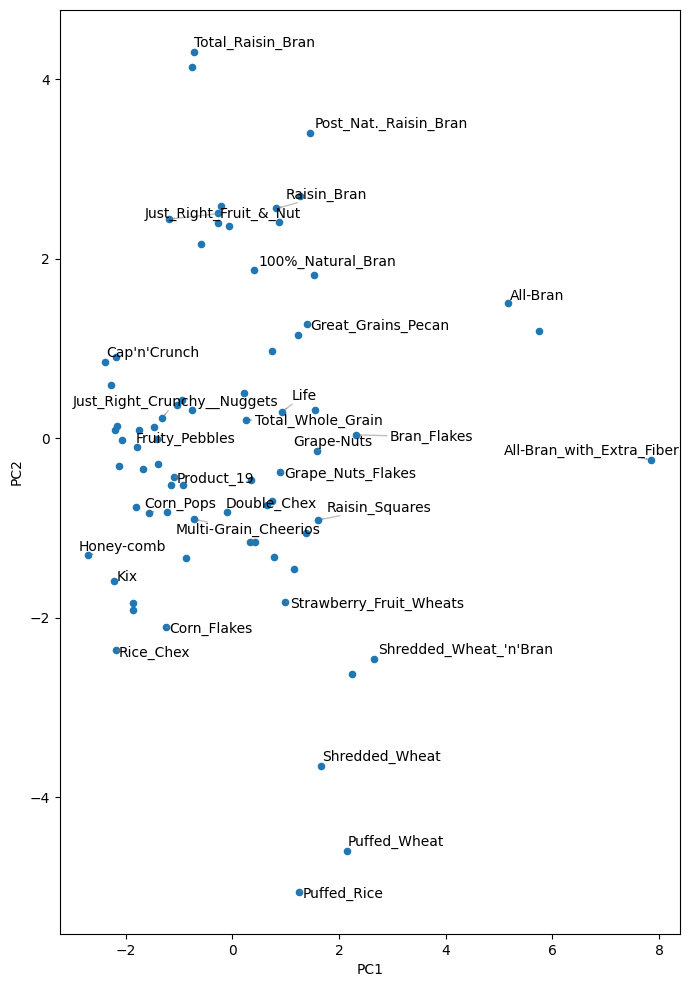

In [18]:
# Python version 2: Reduce the number of labels by clustering the points and labelling only one point per cluster
from sklearn.cluster import KMeans

cereals_pca_df = pd.concat([cereals_df['name'], scores], axis=1) #ignore_index=True)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(8, 12))
points = pd.DataFrame(points)

def extractPoint(df, texts):
    for _, (x, y, s) in df.sample(1)[['PC1','PC2','name']].iterrows():
        texts.append(ax.text(x, y, s))

kmeans = KMeans(n_clusters=30, random_state=0).fit(points[['PC1', 'PC2']])
points['cluster'] = kmeans.labels_
texts = []
points.groupby('cluster').apply(lambda g: extractPoint(g, texts), include_groups=False)

adjust_text(texts, arrowprops={'arrowstyle': '-|>', 'color': 'grey', 'alpha': 0.5})
plt.show()